# Description of The Problem

The very first challenge that new immigrants face when they first choose to move to Australia is which surburb that they should choose to settle down. Many factors should be incorporated to make a well-informed decision. They factors could includes:  
- Housing Affortability: How much is the average housing pricing in the surburb?
- School Accessibility: Are there any good public schools in the surburb?
- Food Accessibility: Are there any good restaurant with in the surburb?
- Coffee Accessibility: All Melbournian love coffee. This seems a must-have.
- Other Facilities: such as parks, movie theaters, etc.

In this project, we're aiming to identiify the most liveable community in Melbourne filtering by the criteria that we have just listed above. Australia is a big country. To perfectly address the above problem, we need quite a big integrated dataset sourcing from multiple channels. Our project is only aiming to prove the feasibility of such a task. Hence, our focus will be on the metropolitan area of Melbourne (Victoria state) ONLY. 

In [25]:
# To make my personal credential invisible to peers, I have stored my credential in a file named credential.py. 
# Here, I wouldn't import the credential. This is the exact credential that I just registered on Foursquare.com
from credential import API_KEY
import pandas as pd
import geopandas as gpd
import json
import requests
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = None

In [5]:
# This section of code is to test retrieving data through Foursquare API.

url_explore = 'https://api.foursquare.com/v2/venues/explore'
url_search = 'https://api.foursquare.com/v2/venues/search'

In [6]:
params = dict(
  client_id=API_KEY['Client_ID'],
  client_secret=API_KEY['Client_Secret'],
  v=API_KEY['Version'],
  ll='40.7243,-74.0018',
  query='coffee',
  limit=1
)
resp = requests.get(url=url_explore, params=params)
data = json.loads(resp.text)

In [7]:
data

{'meta': {'code': 200, 'requestId': '5bd1047d9fb6b75292669112'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'warning': {'text': 'There aren\'t a lot of results for "coffee." Try something more general, reset your filters, or expand the search area.'},
  'suggestedRadius': 600,
  'headerLocation': 'SoHo',
  'headerFullLocation': 'SoHo, New York',
  'headerLocationGranularity': 'neighborhood',
  'query': 'coffee',
  'totalResults': 75,
  'suggestedBounds': {'ne': {'lat': 40.72445115622661,
    'lng': -74.00383671516222},
   'sw': {'lat': 40.72175149644116, 'lng': -74.00111827835521}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '45e98bacf964a52080431fe3',

# Description of The Data

The address the problem that we pointed above. Multiple sources of data will be leveraged to help us find the answer. These data would includes:

- Foursquare Data: The data help us to explore coffee, food, and many other facilities and factors that can determine whether a community / suburb is liverable or not.
- Australia Statistical Boundry Data: The data provide Australian location data in the format of geometry (points or multi-polygon) which define the boundary of a given suburb.
- Real Estate Data: The data contains all the residential property transaction data in year 2017. 
- School Data: The data contains the information of all public shcools with geocoded address

You will see below a snipet of some of the data that we will use...

In [28]:
# Loading the relevant dataset 

housing = pd.read_csv('./data/mel_estate.csv')
school = pd.read_excel('./data/mel_school.xlsx', sheet_name=0)
# Note that geospatial data is in shapely format. So we are using geopandas to load and process the data.
s_boundry = gpd.read_file("./data/oz_suburb.zip/oz_suburn.shp")

In [12]:
housing.head()

,Agency,Price,DateSold,StreetAddress,Postcode,Locality,Latitude,Longitude,LandSize,LandSizeUnit,Bedrooms,Bathrooms,ParkingSpaces,PropertyType
0,First National Real Estate Mike Brown,9500000,2017-06-16,111 Mangans Rd,3140,Lilydale,-37.754930,145.371809,33285,m2,30,16,28,house
1,Marshall White,8150000,2017-05-23,7 Dunraven Avenue,3142,Toorak,-37.845278,145.014403,634,m2,4,3,3,house
2,Aqua Real Estate,7250000,2014-10-17,11 Williams Road,3930,Mount Eliza,-38.174377,145.091247,17184,m2,7,6,5,house
3,Lindellas Real Estate,6850000,2017-02-22,701 Station Street,3128,Box Hill,-37.817247,145.123739,662,m2,1,1,1,house
4,Lindellas Real Estate,6680000,2016-08-11,9-11 Ellingworth Parade,3128,Box Hill,-37.820382,145.124578,928,m2,2,2,1,house


In [14]:
school.head()

,Suburb,Post,School,Score,English Star,Maths Star,Enroll,Type,Pri/Sec?,Coed?,Religion,Other,Address,Telephone,Latitude,Longitude,2016,2015,2014,2013,2012,2011,2010,2009
0,Aberfeldie,3040,Lowther Hall Anglican Grammar School,96,5,4,788,Independent,Primary/Secondary Combined,Girls,Anglican,NaN,17 Leslie Road Essendon VIC,03 9337 5011,-37.7574,144.915,51.0,35.0,50.0,51.0,31.0,16.0,NaN,35.0
1,Carlton,3053,Carlton Primary School,74,3,2,97,Government,Primary,Coed,Non-Denominational,NaN,Neill Street Carlton VIC,03 9347 6022,-37.794,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Carlton North,3054,Carlton North Primary School,93,5,4,253,Government,Primary,Coed,Non-Denominational,NaN,Lee Street Carlton North VIC,03 9347 4822,-37.7912,144.972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Carlton North,3054,Princes Hill Primary School,86,4,4,449,Government,Primary,Coed,Non-Denominational,NaN,Pigdon Street Carlton North VIC,03 9389 5300,-37.7825,144.977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Flemington,3031,Kensington Primary School,92,5,4,469,Government,Primary,Coed,Non-Denominational,NaN,McCracken Street Kensington VIC,03 9376 6013,-37.7937,144.928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
s_boundry.head()

,gid,ssc_code16,ssc_name16,ste_code16,ste_name16,areasqkm16,geometry
0,35,SSC10035,Alison (Dungog - NSW),1,New South Wales,19.2707,"POLYGON ((151.764053147 -32.41493066699996, 15..."
1,32,SSC10032,Alfredtown,1,New South Wales,75.0792,POLYGON ((147.5114750120001 -35.18231799099993...
2,40,SSC10040,Allgomera,1,New South Wales,120.3883,POLYGON ((152.7509116040001 -30.81281309199994...
3,50,SSC10050,Amosfield,1,New South Wales,58.0043,POLYGON ((152.0540580930001 -28.63062838699994...
4,79,SSC10079,Argents Hill,1,New South Wales,76.2545,POLYGON ((152.6762974280001 -30.62597800299994...


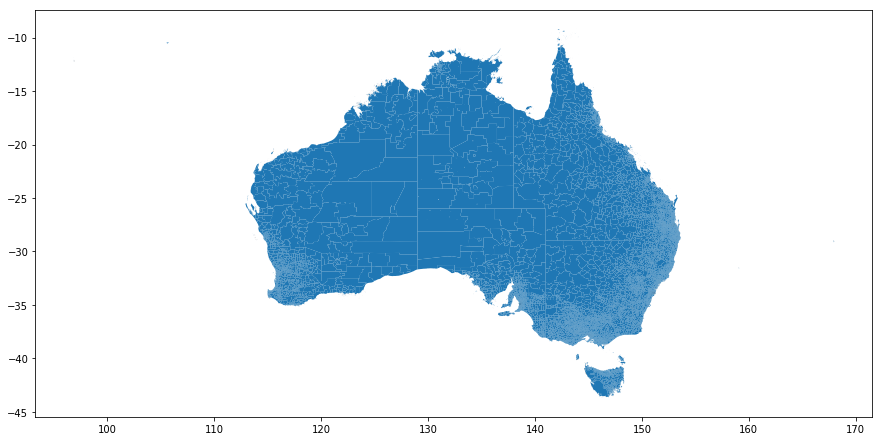

In [27]:
s_boundry.plot(figsize=(15,15))